# The Coupon Problem

In each cereal box there one can find a coupon numbered 0 to 4. In order to receive a prize one must collect a full suite (0,1,2,3,4). On average how many boxes must you open to get a prize?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20180117)

In [2]:
C = 5 ## Number of coupons
T = 100000 ## Number of trials
maxC = 101 ##

In [3]:
def run_trial(_couponCount):
    """ One attempt at collecting a set of coupons
    
    Generates one new coupons between 0 and _couponCount - 1 until a full set is discovered.
    
    Args:
        _couponCount: integer, number of coupons that need to be collected for a full set
    
    Returns:
        boxCount: integer, the number of boxes it took to collect a full set of coupons
    
    """
    couponsDist = np.zeros(_couponCount)
    boxCount = 0
    while np.prod(couponsDist) == 0:
                newCoupon = np.random.randint(low = 0, high = _couponCount)
                couponsDist[newCoupon] += 1
                boxCount += 1
    return boxCount;

def run_sample(_trialsCount, _couponCount):
    """ Runs several trials to collect a set of coupons
    
    Runs the run_trial functions a fixed number of times and collect the number of boxes after which a full set was collected for each trial.
    
    Args:
        _trialsCount: integer, number of trials.
        _couponCount: integer, number of coupons that need to be collected for a full set.
        
    Returns:
        boxCountList: list of integers, each element is the number of boxes it took to collect a full set of coupons in a trial.
    
    """
    boxCountList = []
    for i in range(_trialsCount):
        boxCountList.append(run_trial(_couponCount))
    return boxCountList;

def get_avgs(_trialsCount, _maxCouponCount):
    """ Average number of boxes it takes to complete a coupon set
    
    For each number of coupons calcuates the average number of boxes it took to complete a coupon set.
    
    Args:
        _trialsCount: integer, number of trials.
        _maxCouponCount: integer, will compute averages for all coupon sets up to _maxCouponCount - 1.
        
    Returns:
        avgBoxCountList: list of integers, item i is the average number of boxes it took to complete a set of i coupons.
    
    """
    avgBoxCountList = []
    for c in range(_maxCouponCount):
        avgBoxCountList.append(np.mean(run_sample(_trialsCount, c)))
    return avgBoxCountList;

In [4]:
result = get_avgs(T, maxC)

In [5]:
resultDict = {'Coupons': range(maxC), 'Avg_boxes': result}
resultDf = pd.DataFrame(resultDict, columns = ['Coupons', 'Avg_boxes'])
resultDf

,Coupons,Avg_boxes
0,0,0.00000
1,1,1.00000
2,2,3.00877
3,3,5.48861
4,4,8.35652
5,5,11.45723
6,6,14.71039
7,7,18.20639
8,8,21.69537
9,9,25.46832


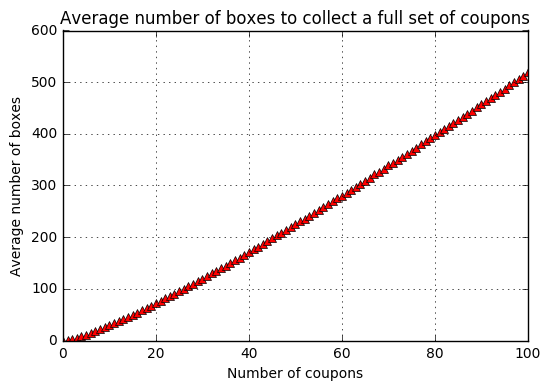

In [6]:
plt.xlabel('Number of coupons')
plt.ylabel('Average number of boxes')
plt.title('Average number of boxes to collect a full set of coupons')
plt.plot(range(maxC), result, 'r^')
plt.grid(True)
plt.show()